### 学習と予測
#### パラメータの事後分布
訓練データ集合を$D$としたとき、ベイズ学習では次のような同時分布$p(D,\theta)$を考えることによってデータを表現するモデルを構築する。
$$
p(D,\theta)=p(D|\theta)p(\theta)
$$
ここで、$\theta$はモデルに含まれる未知のパラメータである。
パラメータに関する事前の不確実性は、事前分布$p(\theta)$を設定することによってモデルに反映される。
特定のパラメータ$\theta$からどのようにしてデータ$D$が発生するのかを記述している部分が$p(D|\theta)$の項の役割であり、これを$\theta$の関数と見た場合は尤度関数と呼ばれる。
データ$D$を観測したあとでは、パラメータの不確実性はベイズの定理を用いて次のように更新される。
$$
p(\theta|D)=\frac{p(D|\theta)p(\theta)}{p(D)}
$$

この$p(\theta|D)$を計算することが、ベイズ学習の枠組みにおける「学習」にあたる部分となる。

#### 予測分布
未観測のデータ$x_*$に対して何らかの知見を得たい場合、次のような予測分布$p(x_*|D)$を計算することによって実現できる。
$$
p(x_*|D)=\int p(x_*|\theta)p(\theta|D)d\theta
$$

データ$D$も未知の値$x_*$もパラメータ$\theta$によって発生過程が支配されるようにモデル化されている。
また、$D$と$x_*$は、パラメータが与えられたもとでの条件付き独立であるといえる。
対応する同時分布を書くと次のようになる。
$$
p(D,x_*,\theta)=p(D|\theta)p(x_*|\theta)p(\theta)
$$
いま、データ$D$だけが手元にあるとすれば、残りの変数の事後分布は、
$$
\begin{align}
p(x_*,\theta|D)&=\frac{p(D,x_*,\theta)}{p(D)}\\
&=\frac{p(D|\theta)p(x_*|\theta)p(\theta)}{p(D)}\\
&=p(x_*|\theta)p(\theta|D)
\end{align}
$$
となる。
この式から$\theta$を積分消去することで予測分布が得られる。

### 離散確率分布の学習と予測
#### ベルヌーイ分布の学習と予測
次のような2値を取る値$x\in\{0,1\}$上の確率分布であるベルヌーイ分布を考えてみる。
$$
p(x|\mu)=Bern(x|\mu)
$$
ここでは、$\mu$の分布を訓練データから推論する方法を考える。
ベルヌーイ分布のパラメータの要件$\mu\in(0,1)$を満たすような値を生成してくれる確率分布が必要となるため、次のようなベータ分布を採用する。
$$
p(\mu)=Beta(\mu|a,b)
$$
ここで、$a,b$は事前分布$p(\mu)$をコントロールするためのパラメータになるが、$\mu$自体が今回のモデルにおけるパラメータであると呼んでいるので、超パラメータと呼ばれることがある。
ベイズの定理を用いれば、$N$個のデータ点$\boldsymbol{X}=\{x_1,\cdots,x_N\}$を観測した後の事後分布は次のような式で計算ができる。
$$
\begin{align}
p(\mu|\boldsymbol{X})&=\frac{p(\boldsymbol{X}|\mu)p(\mu)}{p(\boldsymbol{X})}\\
&=\frac{\{\prod_{n=1}^Np(x_n|\mu) \}p(\mu)}{p(\boldsymbol{X})}\\
&\propto \{\prod_{n=1}^Np(x_n|\mu) \}p(\mu)
\end{align}
$$
対数をとって計算を行う。
$$
\begin{align}
\ln p(\mu|\boldsymbol{X})&=\sum_{n=1}^N\ln p(x_n|\mu)+\ln p(\mu)+const.\\
&=\sum_{n=1}^Nx_n\ln \mu+\sum_{n=1}^N(1-x_n)\ln(1-\mu)+(a-1)\ln\mu+(b-1)\ln(1-\mu)+const.\\
&=(\sum_{n=1}^Nx_n+a-1)\ln\mu+(N-\sum_{n=1}^Nx_n+b-1)\ln(1-\mu)+const.
\end{align}
$$
最後の行は、ベータ分布の対数表現と比べることにより、次のようなベータ分布として事後分布を表現することができることがわかる。
$$
\begin{align}
p(\mu|\boldsymbol{X})&=Beta(\mu|\hat{a},\hat{b})\\
ただし、\hat{a}&=\sum_{n=1}^Nx_n+a\\
\hat{b}&=N-\sum_{n=1}^Nx_n+b
\end{align}
$$


未観測の値$x_*\in\{0,1\}$に対する予測分布計算を行う。
予測分布の定義に従ってパラメータ$\mu$の周辺化を実行する。
$$
\begin{align}
p(x_*)&=\int p(x_*|\mu)p(\mu)dx\\
&=\int Bern(x_*|\mu)Beta(\mu|a,b)d\mu\\
&=C_B(a,b)\int \mu^{x_*}(1-\mu)^{1-x_*}\mu^{a-1}(1-\mu)^{b-1}d\mu\\
&=C_B(a,b)\int \mu^{x_*+a-1}(1-\mu)^{1-x_*+b-1}d\mu
\end{align}
$$
ベータ分布の定義から
$$
\int \mu^{x_*+a-1}(1-\mu)^{1-x_*+b-1}d\mu=\frac{1}{C_B(x_*+a,1-x_*+b)}
$$
となるため、予測分布は次のように書くことができる。
$$
\begin{align}
p(x_*)&=\frac{C_B(a,b)}{C_B(x_*+a,1-x_*+b)}\\
&=\frac{\Gamma(a+b)\Gamma(x_*+a)\Gamma(1-x_*+b)}{\Gamma(a)\Gamma(b)\Gamma(a+b+1)}
\end{align}
$$
$x_*=1$としたとき、$\Gamma(x+1)=x\Gamma(x)$が成り立つことを利用して、
$$
p(x_*=1)=\frac{\Gamma(a+b)\Gamma(1+a)\Gamma(b)}{\Gamma(a)\Gamma(b)\Gamma(a+b+1)}=\frac{a}{a+b}
$$
$x_*=0$としたとき、
$$
p(x_*=0)=\frac{b}{a+b}
$$
となる。
この2つをまとめると、ベルヌーイ分布としての表現が得られる。
$$
\begin{align}
p(x_*)&=\bigl(\frac{a}{a+b} \bigr)^{x_*}\bigl(\frac{b}{a+b} \bigr)^{1-x_*}\\
&=\bigl(\frac{a}{a+b} \bigr)^{x_*}\bigl(1-\frac{a}{a+b} \bigr)^{1-x_*}\\
&=Bern(x_*|\frac{a}{a+b})
\end{align}
$$
$N$個のデータ$\boldsymbol{X}$を観測した後の事後分布$p(\mu|\boldsymbol{X})$も事前分布を同じベータ分布になることが分かったので、
この計算結果を流用すれば、学習後の分布を得ることができる。
これは事後分布のパラメータを使って置き換えるだけで済み、
$$
\begin{align}
p(x_*|\boldsymbol{X})&=Bern(x_*|\frac{\hat{a}}{\hat{a}+\hat{b}})\\
&=Bern(x_*|\frac{\sum_{n=1}^Nx_n+a}{N+a+b})
\end{align}
$$
となる。

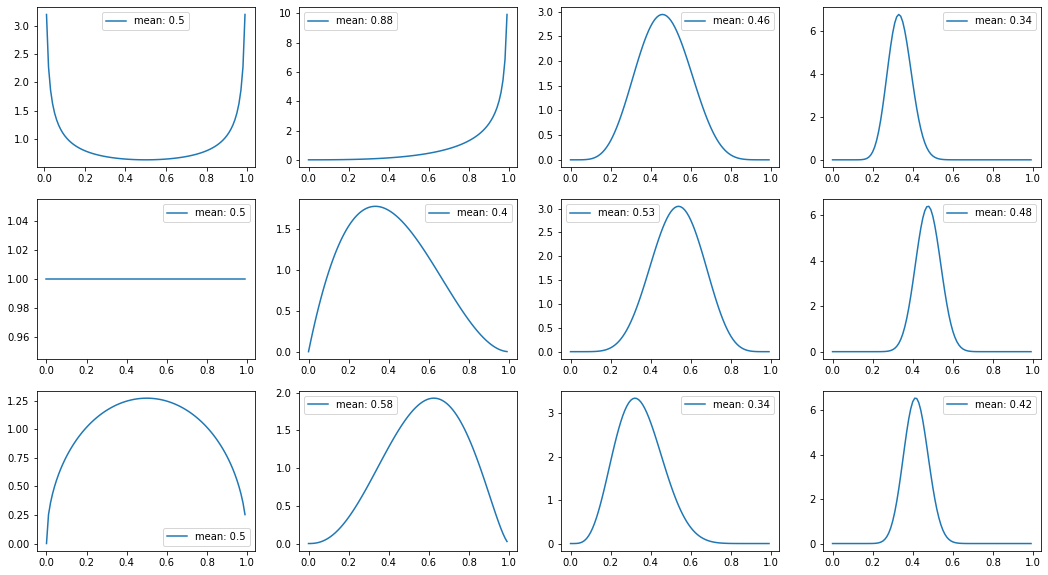

In [2]:
from scipy.stats import bernoulli, beta
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,1, 0.01)
N = [0, 3, 10, 50]

fig, ax = plt.subplots(3, 4, figsize=(18,10))

for i in range(3):
    a = 0.5*(i+1)
    b = 0.5*(i+1)

    for j, n in enumerate(N):
        sample = bernoulli.rvs(p=0.4, size=n)
        a += np.sum(sample==1)
        b += np.sum(sample==0)
    
        y = beta.pdf(x, a, b)

        ax[i][j].plot(x, y, label='mean: '+ str(round(a/(a+b), 2)))
        ax[i][j].legend()

#### カテゴリ分布の学習と予測
カテゴリカル分布の確率質量関数を書くと次のようになる。
$$
p(\boldsymbol{s}|\boldsymbol{\pi})=Cat(\boldsymbol{s}|\boldsymbol{\pi})
$$
$\boldsymbol{s}$は$K$次元ベクトルとし、それぞれの要素が$s_k\in\{0,1\}$、かつ$\sum_{k=1}^Ks_k=1$を満たすとする。
カテゴリカル分布のパラメータは$\sum_{k=1}^K\pi_k=1$かつ$\pi_k\in(0,1)$を満たす必要があり、そのような$K$次元の変数を生成できるのは次のようなディリクレ分布があてはまる。
$$
p(\boldsymbol{\pi})=Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})
$$
カテゴリ分布に従うとした$N$個の離散値データ$\boldsymbol{S}=\{\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N\}$で手元にあるとする。
ベイズの定理を用いれば、$\boldsymbol{\pi}$の事後分布は次の形で計算ができる。
$$
\begin{align}
p(\boldsymbol{\pi}|\boldsymbol{S})&\propto p(\boldsymbol{S}|\boldsymbol{\pi})p(\boldsymbol{\pi})\\
&=\{\prod_{n=1}^NCat(\boldsymbol{s}_n|\boldsymbol{\pi})\}Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})
\end{align}
$$
対数を使って計算を進める。
$$
\begin{align}
\ln p(\boldsymbol{\pi}|\boldsymbol{S})&=\sum_{n=1}^NCat(\boldsymbol{s}_n|\boldsymbol{\pi})+\ln Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})+const.\\
&=\sum_{n=1}^N\sum_{k=1}^Ks_{n,k}\ln \pi_k+\sum_{k=1}^K(\alpha_k-1)\ln\pi_k+\ln C_D(\boldsymbol{\alpha})+const.\\
&=\sum_{k=1}^K(\sum_{n=1}^Ns_{n,k}+\alpha_k-1)\ln\pi_k+const.
\end{align}
$$
ここで$s_{n,k}$は$K$次元ベクトル$\boldsymbol{s}_n$の$k$番目の要素を指す。
事後分布も次のようなディリクレ分布として記述ができる。
$$
p(\boldsymbol{\pi}|\boldsymbol{S})=Dir(\boldsymbol{\pi}|\hat{\boldsymbol{\alpha}})\\
ただし、\hat{\alpha}_k=\sum_{n=1}^Ns_{n,k}+\alpha_k,\ for\ k=1,\cdots,K
$$
未観測の$\boldsymbol{s}_*$を、超パラメータ$\boldsymbol{\alpha}$をもつ事前分布$p(\boldsymbol{\pi})$に基づいて予測することを考える。
次のようにパラメータ$\boldsymbol{\pi}$を周辺化除去することで予測分布が計算できる。
$$
\begin{align}
p(\boldsymbol{s}_*)&=\int p(\boldsymbol{s_*|\boldsymbol{\pi}})p(\boldsymbol{\pi})d\boldsymbol{\pi}\\
&=\int Cat(\boldsymbol{s}_*|\boldsymbol{\pi})Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})d\boldsymbol{\pi}\\
&=C_D(\boldsymbol{\alpha})\int \prod_{k=1}^K\pi_k^{s_{*,k}}\pi_k^{\alpha_k-1}d\boldsymbol{\pi}\\
&=C_D(\boldsymbol{\alpha})\int \prod_{k=1}^K\pi_k^{s_{s_*,k}+\alpha_k-1}d\boldsymbol{\pi}\\
&=\frac{C_D(\boldsymbol{\alpha})}{C_D((s_{*,k}+\alpha_k)_{k=1}^K)}
\end{align}
$$
ここで、$(s_{*,k}+\alpha_k)_{k=1}^K$は$K$次元のベクトルを表す。
さらに、正規化項に関する式を使えば、予測分布は次のように書ける。
$$
p(\boldsymbol{s}_*)=\frac{\Gamma(\sum_{k=1}^K\alpha_k)\prod_{k=1}^K\Gamma(s_{*,k}+\alpha_k)}{\prod_{k=1}^K\Gamma(\alpha_k)\Gamma(\sum_{k=1}^K(s_{*,k}+\alpha_k))}
$$
$s_{*,k'}=1$となる場合だけを考えてみると、
$$
p(s_{*,k'}=1)=\frac{\alpha_k'}{\sum_{k=1}^K\alpha_k}
$$
となる。これをカテゴリ分布でまとめなおすと、次のようになる。
$$
p(\boldsymbol{s}_*)=Cat(\boldsymbol{s}_*|\biggl(\frac{\alpha_k}{\sum_{k=1}^K\alpha_k} \biggr)_{k=1}^K)
$$

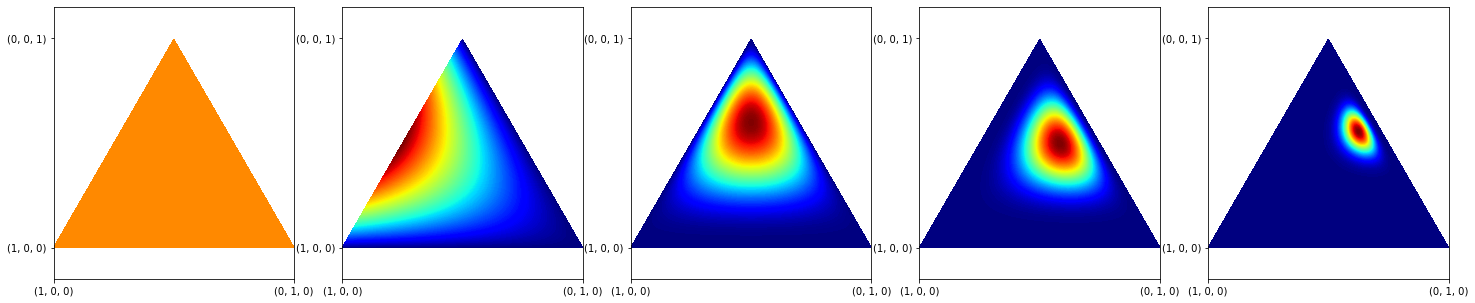

In [719]:
from scipy.stats import multinomial, dirichlet
import matplotlib.pyplot as plt
import matplotlib.tri as tri

pi = [0.2, 0.3, 0.5]
N = [0, 2, 3, 7, 40]

corners = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]])
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 for i in range(3)]

def xy2bc(xy):
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, 0.0, 1.0)
refiner = tri.UniformTriRefiner(tri.Triangulation(corners[:, 0], corners[:, 1]))
trimesh = refiner.refine_triangulation(subdiv=8)

fig, ax = plt.subplots(1, 5, figsize=(25,5))
alpha = np.array([1 ,1, 1])
for i, n in enumerate(N):
    sample = multinomial.rvs(n=1, p=pi, size=n)
    alpha += sample.sum(axis=0)
    
    dc = dirichlet(alpha)
    pvals = [dc.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    ax[i].tricontourf(trimesh, pvals, 200, cmap='jet')
    ax[i].axis('equal')
    ax[i].set_xticks(ticks=[0.0, 1.0]) # x軸目盛
    ax[i].set_xticklabels(['(1, 0, 0)', '(0, 1, 0)'])
    ax[i].set_yticks(ticks=[0.0, 0.87]) # y軸目盛
    ax[i].set_yticklabels(['(1, 0, 0)', '(0, 0, 1)'])

#### ポアソン分布の学習と予測
次のようにポアソン分布はパラメータとして$\lambda\in R^+$をもっている。
$$
p(x|\lambda)=Poi(x|\lambda)
$$
$\lambda$の事前分布としてはガンマ分布を使用する。
$$
p(\lambda)=Gam(\lambda|a,b)
$$
ポアソン分布に従っていると仮定した$N$個の非負の離散値$\boldsymbol{X}=\{x_1,\cdots,x_N\}$を観測したとき、事後分布は次のように計算される。
$$
\begin{align}
p(\lambda|\boldsymbol{X})\propto p(\boldsymbol{X}|\lambda)p(\lambda)\\
&=\{\prod_{n=1}^NPoi(x_n|\lambda)\}Gam(\lambda|a,b)
\end{align}
$$
対数計算を行うことで$\lambda$に関する関数形式を調べる。
$$
\begin{align}
\ln p(\lambda|\boldsymbol{X})&=\sum_{n=1}^NPoi(x_n|\lambda)+\ln Gam(\lambda|a,b)+const.\\
&=\sum_{n=1}^N\{x_n\ln\lambda - \ln x_n!-\lambda \}+(a-1)\ln\lambda-b\lambda+\ln C_G(a,b)+const.\\
&=(\sum_{n=1}^Nx_n+a-1)\ln\lambda - (N+b)\lambda+const.
\end{align}
$$
事後分布はガンマ分布と同じ形式になることがわかった。
$$
\begin{align}
p(\lambda|\boldsymbol{X})&=Gam(\lambda|\hat{a},\hat{b})\\
ただし、\hat{a}&=\sum_{n=1}^Nx_n+a\\
\hat{b}&=N+b
\end{align}
$$
となる。
未観測のデータ$x_*$に関する予測分布は次から計算できる。
$$
\begin{align}
p(x_*)&=\int p(x_*|\lambda)p(\lambda)d\lambda\\
&=\int Poi(x_*|\lambda)Gam(\lambda|a,b)d\lambda\\
&=\int\frac{\lambda^{x_*}}{x_*!}e^{-\lambda}C_G(a,b)\lambda^{a-1}e^{-b\lambda}d\lambda\\
&=\frac{C_G(a,b)}{x_*!}\int \lambda^{x_*+a-1}e^{-(1+b)\lambda}d\lambda
\end{align}
$$
ガンマ分布の定義式に戻れば、最後の行の積分は次のように解析的に求まることがわかる。
$$
\int \lambda^{x_*+a-1}e^{-(1+b)\lambda}d\lambda=\frac{1}{C_G(x_*+a,1+b)}
$$
したがって、求めたい予測分布は次のように書ける。
$$
p(x_*)=\frac{C_G(a,b)}{x_*!C_G(x_*+a,1+b)}
$$
この確率分布は、次のようなパラメータ$r\in R^+$および$p\in(0,1)$をもつ負の二項分布として知られている。
$$
\begin{align}
p(x_*)&=NB(x_*|r,p)\\
&=\frac{\Gamma(x_*+r)}{x_*!\Gamma(r)}(1-p)^rp^{x_*}
\end{align}
$$
ただし、パラメータ$r$および$p$は、ここでは次のようになる。
$$
\begin{align}
r&=a\\
p&=\frac{1}{b+1}
\end{align}
$$
この分布の基本的な期待値は次のようになる。
$$
\begin{align}
<x_*>&=\frac{pr}{1-p}\\
<x_*^2>&=\frac{pr(pr+1)}{(1-p)^2}
\end{align}
$$

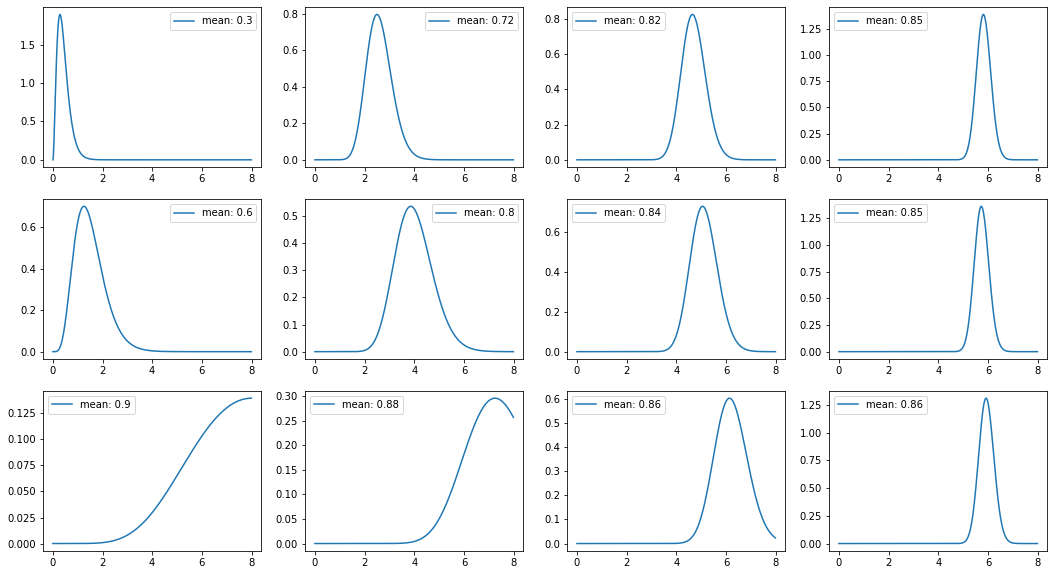

In [627]:
from scipy.stats import poisson, gamma

lmd = 6

x=np.arange(0,8, 0.01)
N = [0, 3, 10, 50]

fig, ax = plt.subplots(3, 4, figsize=(18,10))

for i in range(3):
    a = 3*(i+1)
    b = 10-3*(i+1)

    for j, n in enumerate(N):
        sample = poisson.rvs(mu=lmd, size=n)
        a += np.sum(sample)
        b += len(sample)
    
        y = gamma.pdf(x,a=a,scale=1/b)

        ax[i][j].plot(x, y, label='mean: '+ str(round(a/(a+b), 2)))
        ax[i][j].legend()

### 1次元ガウス分布の学習と予測
1次元のガウス分布は平均値$\mu$と分散$\sigma^2$の2つのパラメータを持つ。
ここでは説明を単純にするために、ここでは分散$\sigma^2$の代わりに、その逆数である精度パラメータ$\lambda=\sigma^{-2}$を表記として用いることとする。
#### 平均値が未知の場合
ガウス分布に従うと仮定している$N$個のデータを用いて、ガウス分布の平均値$\mu\in R$のみを学習する設定で推論を行う。
したがってここでは精度パラメータ$\lambda\in R^+$は固定であるとし、学習したい平均パラメータ$\mu$のみに事前分布を設定すればよい。
ある観測値$x\in R$に対して、次のようなガウス分布を考える。
$$
p(x|\mu)=N(x|\mu,\lambda^{-1})
$$
$\mu$に対しては、次のようなガウス事前分布が共役事前分布であることが知られている。
$$
p(\mu)=N(\mu|m,\lambda_\mu^{-1})
$$
$m\in R$および$\lambda_\mu\in R^+$は今回固定された超パラメータである。
ガウス分布に従うと仮定している$N$個の1次元連続値データ$\boldsymbol{X}=\{x_1,\cdots,x_N\}$を観測したとする。
ベイズの定理を用いれば事後分布は次のように書ける。
$$
\begin{align}
p(\mu|\boldsymbol{X})&\propto p(\boldsymbol{X}|\mu)p(\mu)\\
&=\{\prod_{n=1}^Np(x_n|\mu)\}p(\mu)\\
&=\{\prod_{n=1}^N N(x_n|\mu,\lambda^{-1})\}N(\mu|m,\lambda_\mu^{-1})
\end{align}
$$
対数計算を行い、$\mu$に関する関数形式を調べる。
$$
\begin{align}
\ln p(\mu|\boldsymbol{X})&=\sum_{n=1}^N\ln N(x_n|\mu,\lambda^{-1})+\ln N(\mu|m,\lambda_\mu^{-1})+const.\\
&=-\frac{1}{2}\{(N\lambda+\lambda_\mu)\mu^2-2(\sum_{n=1}^Nx_n\lambda+m\lambda_\mu)\mu\}+const.
\end{align}
$$
ここで、事後分布が次のような形式のガウス分布で書けるとする。
$$
p(\mu|\boldsymbol{X})=N(\mu|\hat{m},\hat{\lambda}_\mu^{-1})
$$
対数を取り、整理すると次のようになる。
$$
\ln p(\mu|\boldsymbol{X})=-\frac{1}{2}\{\hat{\lambda}_\mu\mu^2-2\hat{m}\hat{\lambda}_\mu\mu\}+const.
$$
係数を比較することで、事後分布のパラメータ$\hat{m}$および$\hat{\lambda}_\mu$が次のように求まる。
$$
\begin{align}
\hat{\lambda}_\mu&=N\lambda+\lambda_\mu\\
\hat{m}&=\frac{\lambda\sum_{n=1}^Nx_n+\lambda_\mu m}{\hat{\lambda}_\mu}
\end{align}
$$
未観測データ$x_*$に対する予測分布は、次のような周辺分布を計算することに対応する。
$$
\begin{align}
p(x_*)&=\int p(x_*|\mu)p(\mu)d\mu\\
&=\int N(x_*|\mu,\lambda^{-1})N(\mu|m,\lambda_\mu^{-1})d\mu
\end{align}
$$
ベイズの定理より、次の関係性が成り立つことが分かる。
$$
p(\mu|x_*)=\frac{p(x_*|\mu)p(\mu)}{p(x_*)}
$$
対数を取って$p(x_*)$に関して求めると、次のようになる。
$$
\ln p(x_*)=\ln p(x_*|\mu)-\ln p(\mu|x_*)+const.
$$
先ほどの事後分布の計算と同様の手続きで計算できる。
$$
\begin{align}
p(\mu|x_*)&=N(\mu|m(x_*),(\lambda+\lambda_*)^{-1})\\
ただしm(x_*)&=\frac{\lambda x_*+\lambda_\mu m}{\lambda + \lambda_\mu}
\end{align}
$$
のようになる。
対数計算すると、
$$
\begin{align}
\ln p(x_*)&=-\frac{1}{2}\{\lambda(x_*-\mu)^2-(\lambda + \lambda_\mu)(\mu - m(x_*))^2 \}+const.\\
&=-\frac{1}{2}\bigl\{ \frac{\lambda\lambda_\mu}{\lambda+\lambda_\mu}x_*^2 - \frac{2m\lambda\lambda_\mu}{\lambda + \lambda_\mu}x_* \bigr\}+const.
\end{align}
$$
のようになり、事後分布を求めたときと同じ議論で、ここから平均と精度を計算すれば、予測分布は、
$$
\begin{align}
p(x_*)&=N(x_*|\mu_*,\lambda_*^{-1})\\
ただし\lambda_*&=\frac{\lambda\lambda_\mu}{\lambda + \lambda_\mu}\\
\mu_*&=m
\end{align}
$$
となる。

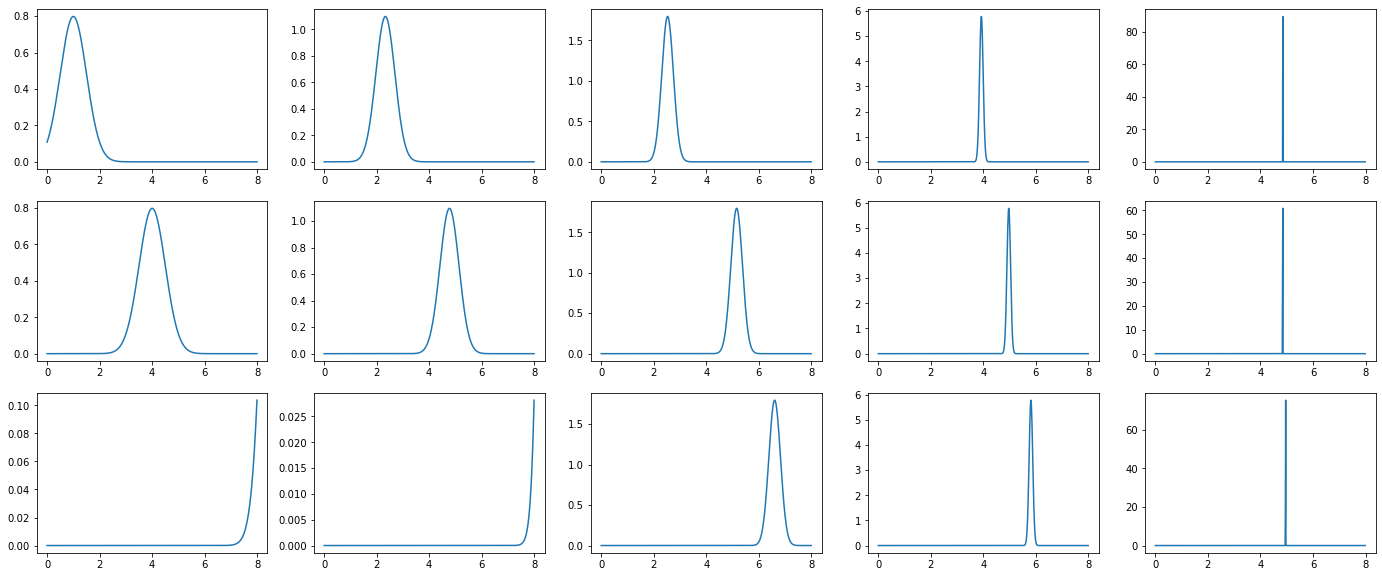

In [706]:
from scipy.stats import norm

mu = 5
sig = 2
lmd = 1/sig**2

x=np.arange(0,8, 0.01)
N = [0, 3, 10, 50, 1000]
fig, ax = plt.subplots(3, 5, figsize=(24,10))

for i in range(3):
    m = int((i+1)**2)
    lmd_mu = 2

    for j, n in enumerate(N):
        sample = norm.rvs(mu, 1/lmd, size=n)
        lmd_n = norm.rvs(m, 1/lmd_mu, size=n)
        
        lmd_hat = len(sample)*lmd + lmd_mu
        m_hat = (lmd*np.sum(sample)+lmd_mu*m) / lmd_hat
    
        y = norm.pdf(x,m_hat,1/lmd_hat)

        ax[i][j].plot(x, y)

#### 精度が未知の場合
精度$\lambda$のみをデータから学習するモデルを考える。
ここで、観測モデルは、
$$
p(x|\lambda)=N(x|\mu,\lambda^{-1})
$$
と書くこととする。
$\lambda$は正の実数値を持つので、次のようなガンマ事前分布を与えることにする。
$$
p(\lambda) = Gam(\lambda |a,b)
$$
ベイズの定理により、$\lambda$の事後分布は次のように求められる。
$$
\begin{align}
p(\lambda|\boldsymbol{X})&\propto p(\boldsymbol{X}|\lambda)p(\lambda)\\
&=\{\prod_{n=1}^Np(x_n|\lambda)\}p(\lambda)\\
&=\{\prod_{n=1}^N N(x_n|\mu,\lambda^{-1})\}Gam(\lambda|a,b)
\end{align}
$$
対数計算を行い、具体的に$\lambda$に関する関数形式を調べる。
$$
\begin{align}
\ln p(\lambda|\boldsymbol{X})&=\sum_{n=1}^N N(x_n|\mu,\lambda^{-1})+\ln Gam(\lambda|a,b)+const.\\
&=(\frac{N}{2}+a-1)\ln\lambda-\{\frac{1}{2}\sum_{n=1}^N(x_n-\mu)^2+b\}\lambda+const.
\end{align}
$$
これは、次のようなガンマ分布になることがわかる。
$$
\begin{align}
p(\lambda|\boldsymbol{X})&=Gam(\lambda|\hat{a},\hat{b})\\
ただし\hat{a}&=\frac{N}{2}+a\\
\hat{b}&=\frac{1}{2}\sum_{n=1}^N(x_n-\mu)^2+b
\end{align}
$$ベイズの定理により、$x_*$と$\lambda$に関して次のような関係性が成り立つ。
$$
p(\lambda|x_*)=\frac{p(x_*|\lambda)p(\lambda)}{p(x_*)}
$$
対数を取って$p(\lambda)$の項を無視すれば、$p(x_*)$は次のように計算できる。
$$
\ln p(x_*)=\ln p(x_*|\lambda)-\ln p(\lambda|x_*)+const.
$$
$p(x_*|\lambda)$は、1個の点$x_*$を観測したあとおｎ事後分布のようなものと考えられるので、次のように書ける。
$$
\begin{align}
p(\lambda|x_*)&=Gam(\lambda|\frac{1}{2}+a,b(x_*))\\
ただしb(x_*)&=\frac{1}{2}(x_*-\mu)^2+b
\end{align}
$$
結果的に、
$$
\ln p(x_*)=-\frac{2a+1}{2}\ln\{1+\frac{1}{2b}(x_*-\mu)^2 \}+const.
$$
と書くことができる。
この結果は次のようなスチューデントのt分布と呼ばれる分布に対数をとったものになっている。
$$
St(x|\mu_s,\lambda_s,\nu_s)=\frac{\Gamma(\frac{\nu_s+1}{2})}{\Gamma(\frac{\nu_s}{2})}\biggl(\frac{\lambda_s}{\pi\nu_s}\biggr)^{\frac{1}{2}}\biggl\{1+\frac{\lambda_s}{\nu_s}(x-\mu_s)^2 \biggr\}^{-\frac{\nu_s+1}{2}}
$$
対数を取って、確率変数$x$に関わらない項を$const.$にまとめれば次のようになる。
$$
\ln St(x|\mu_s,\lambda_s,\nu_s)=-\frac{\nu_s+1}{2}\ln\biggl\{1+\frac{\lambda_s}{\nu_s}(x-\mu_s)^2 \biggr\}+const.
$$
対応関係から、予測分布は次のように書けることになる。
$$
\begin{align}
p(x_*)&=St(x|\mu_s,\lambda_s,\nu_s)\\
ただし\mu_s&=\mu\\
\lambda_s&=\frac{a}{b}\\
\nu_s&=2a
\end{align}
$$

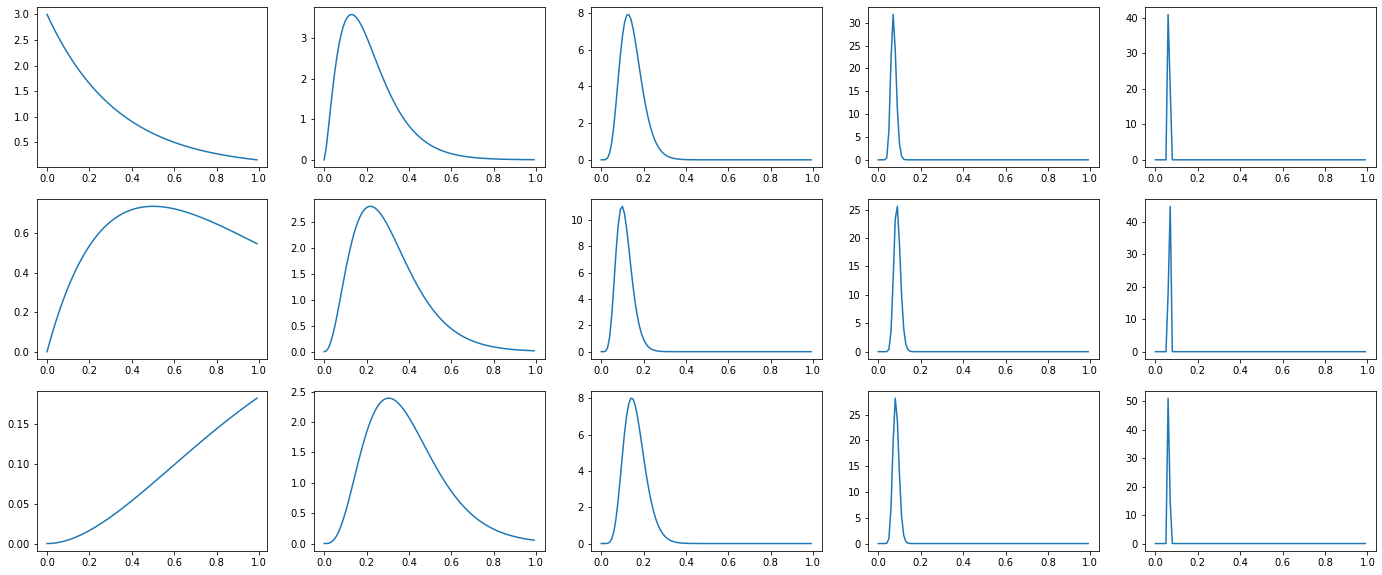

In [716]:
from scipy.stats import t

mu = 5
sig = 2
lmd = 1/sig**2

x=np.arange(0, 1, 0.01)
N = [0, 3, 10, 50, 1000]
fig, ax = plt.subplots(3, 5, figsize=(24,10))

for i in range(3):
    a = 1*(i+1)
    b = 4-1*(i+1)

    for j, n in enumerate(N):
        sample = norm.rvs(mu, 1/lmd, size=n)
        
        a += n / 2
        b += np.sum((sample-mu)**2)/2
    
        y = gamma.pdf(x,a,scale=1/b)

        ax[i][j].plot(x, y)

#### 平均・精度が未知の場合
ここでの観測モデルは次のように記述することにする。
$$
p(x|\mu,\lambda)=N(x|\mu,\lambda^{-1})
$$
1次元ガウス分布では次のような$m,\beta,a,b$を固定パラメータとしたガウス・ガンマ分布を事前分布として仮定すると、まったく同じ形式の事後分布が得られることが知られている。
$$
\begin{align}
p(\mu,\lambda)&=NG(\mu,\lambda|m,\beta,a,b)\\
&=N(\mu|m,(\beta\lambda)^{-1})Gam(\lambda|a,b)
\end{align}
$$
まず、平均値$\mu$にのみ注目してみることにする。
事後分布の$p(\mu|\lambda,\boldsymbol{X})$の部分は次のように書ける。
$$
\begin{align}
p(\mu|\lambda,\boldsymbol{X})&=N(\mu|\hat{m},(\hat{\beta}\lambda)^{-1})\\
ただし\hat{\beta}&=N+\beta\\
\hat{m}&=\frac{1}{\hat{\beta}}(\sum_{n=1}^Nx_n+\beta m)
\end{align}
$$
次に残りの$p(\lambda|\boldsymbol{X})$を求める。
まず、同時分布を条件付き分布の積によって次のように書き下す。
$$
p(\boldsymbol{X},\mu,\lambda)=p(\mu|\lambda,\boldsymbol{X})p(\lambda|\boldsymbol{X})p(\boldsymbol{X})
$$
ここから、
$$
\begin{align}
p(\lambda|\boldsymbol{X})&=\frac{p(\boldsymbol{X},\mu,\lambda)}{p(\mu|\lambda,\boldsymbol{X})p(\boldsymbol{X})}\\
&\propto \frac{p(\boldsymbol{X},\mu,\lambda)}{p(\mu|\lambda,\boldsymbol{X})}
\end{align}
$$
としてしまえば、モデルとして初めから与えられている同時分布$p(\boldsymbol{X},\mu,\lambda)=p(\boldsymbol{X}|\mu,\lambda)p(\mu,\lambda)$と、すでに求めてある$p(\mu|\lambda,\boldsymbol{X})$を使うことによって$\lambda$の事後分布が明らかになると考えられる。
対数を取って実際に$\lambda$に関する関数形式を求めてみると、
$$
\ln p(\lambda|\boldsymbol{X})=(\frac{N}{2}+a-1)\ln\lambda-\{\frac{1}{2}(\sum_{n=1}^Nx_n^2+\beta m^2-\hat{\beta}\hat{m}^2)+b\}\lambda+const.
$$
という形に整理でき、ガンマ分布の定義式と照らし合わせれば、これは次のようにまとめられる。
$$
\begin{align}
p(\lambda|\boldsymbol{X})&=Gam(\lambda|\hat{a},\hat{b})\\
ただし\hat{a}&=\frac{N}{2}+a\\
\hat{b}&=\frac{1}{2}(\sum_{n=1}^Nx_n^2+\beta m^2-\hat{\beta}\hat{m}^2)+b
\end{align}
$$
事前分布$p(\mu,\lambda)$を使った予測分布の計算を行う。
ベイズの定理を使って$x_*$に無関係な項を無視すれば、予測分布$p(x_*)$に対して次のような式が成り立つ。
$$
\ln p(x_*)=\ln p(x_*|\mu,\lambda)-\ln p(\mu,\lambda|x_*)+const.
$$
2つ目の項は、事後分布の計算結果を流用すれば、
$$
\begin{align}
p(\mu,\lambda|x_*)&=N(\mu|m(x_*),\{(1+\beta)\lambda\}^{-1})Gam(\lambda|\frac{1}{2}+a,b(x_*))\\
ただしm(x_*)&=\frac{x_*+\beta m}{1+\beta}\\
b(x_*)&=\frac{\beta}{2(1+\beta)}(x_*-m)^2+b
\end{align}
$$
と書くことができるので、$x_*$に関わる項のみで整理すると、
$$
\ln p(x_*)=-\frac{1+2a}{2}\ln\{1+\frac{\beta}{2(1+\beta)b}(x_*-m)^2\}+const.
$$
となる。
これは1次元のスチューデントのt分布に対数を取ったものと同じ形をとり、
$$
\begin{align}
p(x_*)&=St(x_*|\mu_s,\lambda_s,\nu_s)\\
ただし\mu_s=m\\
\lambda_s&=\frac{\beta a}{(1+\beta)b}\\
\nu_s&=2a
\end{align}
$$
として予測分布を解析的に求めることができる。

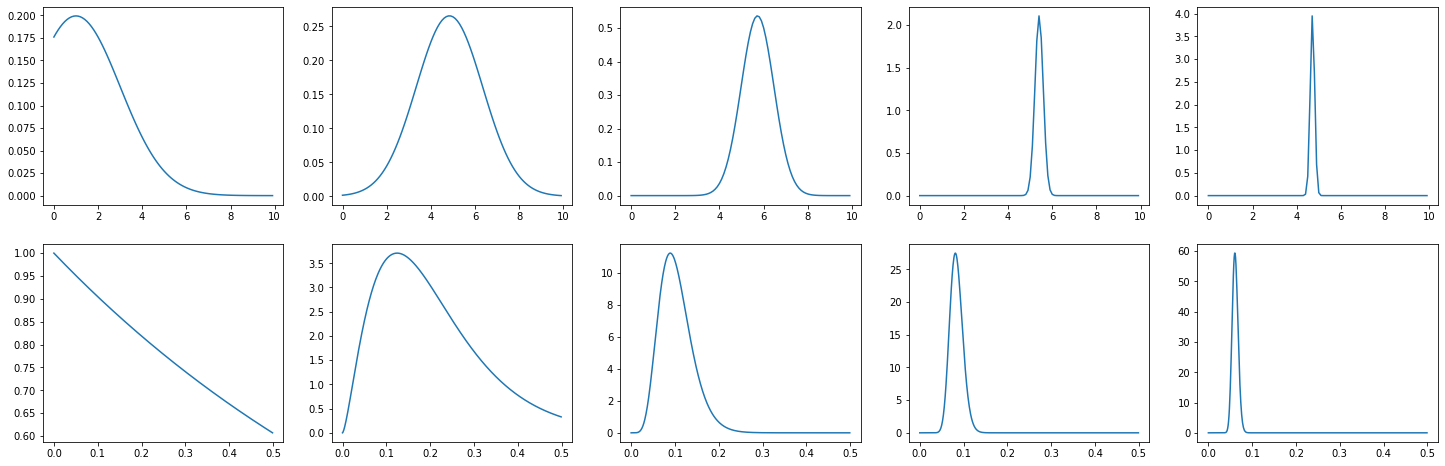

In [807]:
mu = 5
sig = 2
lmd = 1/sig**2

m = 1
beta = 1
a = 1
b = 1

N = [0, 3, 10, 50, 100]

x1=np.arange(0,10,0.1)
x2=np.arange(0,0.5,0.001)

fig, ax = plt.subplots(2, 5, figsize=(25,8))

for i, n in enumerate(N):
    sample = norm.rvs(mu, 1/lmd, size=n)

    beta_hat = n + beta
    m_hat = (np.sum(sample)+beta*m)/beta_hat

    a = n/2 + a
    b = (np.sum(sample**2)+beta*m**2-beta_hat*m_hat**2)/2+b
    lmd_hat = beta_hat*a/(1+beta_hat)/b
    
    beta = beta_hat
    m = m_hat
    
    y1 = norm.pdf(x1,m_hat,1/(beta_hat*lmd_hat))
    y2 = gamma.pdf(x2, a, scale=1/b)
    
    ax[0][i].plot(x1, y1)
    ax[1][i].plot(x2, y2)

### 多次元ガウス分布の学習と予測
ここでも共分散行列を扱う代わりに、その逆行列である精度行列$\boldsymbol{\Lambda}=\boldsymbol{\Sigma}^{-1}$を表記して使う。
#### 平均が未知の場合
$D$次元の確率変数$\boldsymbol{x}\in R^D$の平均パラメータ$\boldsymbol{\mu}\in R^D$のみが未知で、精度行列$\boldsymbol{\Lambda}\in R^{D×D}$はすでに与えられていることとして推論を行う。
観測モデルは次のようになる。
$$
p(\boldsymbol{x}|\boldsymbol{\mu})=n(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Sigma}^{-1})
$$
精度行列$\boldsymbol{\Lambda}$は正定値行列として事前に設定する必要がある。
固定された超パラメータ$\boldsymbol{m}\in R^D$および$\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\in R^{D×D}$を導入し、
$$
p(\boldsymbol{\mu})=N(\boldsymbol{\mu}|\boldsymbol{m},\boldsymbol{\Lambda}_{\boldsymbol{\mu}}^{-1})
$$
のように設定することができる。
$N$個のデータ$\boldsymbol{X}$を観測した後の事後分布は次のようになる。
$$
\begin{align}
p(\boldsymbol{\mu}|\boldsymbol{X})&\propto p(\boldsymbol{X}|\boldsymbol{\mu})p(\boldsymbol{\mu})\\
&=\{\prod_{n=1}^Np(\boldsymbol{x}_n|\boldsymbol{\mu})\}p(\boldsymbol{\mu})\\
&=\{\prod_{n=1}^NN(\boldsymbol{x}_n|\boldsymbol{\mu},\boldsymbol{\Sigma}^{-1})\}N(\boldsymbol{\mu}|\boldsymbol{m},\boldsymbol{\Sigma}_{\boldsymbol{\mu}}^{-1})
\end{align}
$$
対数を取り、$\boldsymbol{\mu}$に関して整理する。
$$
\begin{align}
\ln p(\boldsymbol{\mu}|\boldsymbol{X})&=\sum_{n=1}^N\ln N(\boldsymbol{x}_n|\boldsymbol{\mu},\boldsymbol{\Sigma}^{-1})+\ln N(\boldsymbol{\mu}|\boldsymbol{m},\boldsymbol{\Sigma}_{\boldsymbol{\mu}}^{-1})+const.\\
&=-\frac{1}{2}\{\boldsymbol{\mu}^T(N\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}})\boldsymbol{\mu} - 2\boldsymbol{\mu}^T(\boldsymbol{\Lambda}\sum_{n=1}^N\boldsymbol{x}_n+\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\boldsymbol{m})\}+const.
\end{align}
$$
再び結果の事後分布を次のようにおくことによって事後分布のパラメータを計算する。
$$
p(\boldsymbol{\mu}|\boldsymbol{X})=N(\boldsymbol{\mu}|\hat{\boldsymbol{m}},\hat{\boldsymbol{\Lambda}}_\boldsymbol{\mu}^{-1})
$$
対数を取って$\boldsymbol{\mu}$に関して整理すると、
$$
\ln p(\boldsymbol{\mu}|\boldsymbol{X})=-\frac{1}{2}\{\boldsymbol{\mu}^T\hat{\boldsymbol{\Lambda}}_{\boldsymbol{\mu}}\boldsymbol{\mu}-2\boldsymbol{\mu}^T\hat{\boldsymbol{\Lambda}}_\boldsymbol{\mu}\hat{\boldsymbol{m}}\}+const.
$$
となるので、対応関係をとれば、
$$
\begin{align}
\hat{\boldsymbol{\Lambda}}_\boldsymbol{\mu}&=N\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\\
\hat{\boldsymbol{m}}&=\hat{\boldsymbol{\Lambda}}_{\boldsymbol{\mu}}^{-1}(\boldsymbol{\Lambda}\sum_{n=1}^Nx_n+\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\boldsymbol{m})
\end{align}
$$
と求められる。
観測されていないデータ点$\boldsymbol{x}_*\in R^D$に関する予測分布$p(\boldsymbol{x}_*)$を求める。
ベイズの定理を使い予測分布を対数の形で書くと、
$$
\ln p(\boldsymbol{x}_*)=\ln p(\boldsymbol{x}_*|\boldsymbol{\mu})-\ln p(\boldsymbol{\mu}|\boldsymbol{x}_*)+const.
$$
となる。
今までの結果を流用すれば、
$$
\begin{align}
p(\boldsymbol{\mu}|\boldsymbol{x}_*)&=N(\boldsymbol{\mu}|\boldsymbol{m}(\boldsymbol{x}_*),(\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}}^{-1}))\\
ただし\boldsymbol{m}(\boldsymbol{x}_*)&=(\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}})^{-1}(\boldsymbol{\Lambda}\boldsymbol{x}_*+\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\boldsymbol{m})
\end{align}
$$
となる。$\boldsymbol{m}(\boldsymbol{x}_*)$は$D$次元の平均パラメータであり、内部に予測分布の計算に必要な$\boldsymbol{x}_*$を含んでいる。
これを利用すると、
$$
\begin{align}
\ln p(\boldsymbol{x_*})&=-\frac{1}{2}\{\boldsymbol{x}_*^T(\boldsymbol{\Lambda}-\boldsymbol{\Lambda}(\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}})^{-1}\boldsymbol{\Lambda})\boldsymbol{x}_*-2\boldsymbol{x}_*^T\boldsymbol{\Lambda}(\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}})^{-1}\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\boldsymbol{m}\}+const.
\end{align}
$$
と書ける。
ここで、この分布が次のようなガウス分布として書けるとする。
$$
p(\boldsymbol{x}_*)=N(\boldsymbol{x}_*|\boldsymbol{\mu}_*,\boldsymbol{\Lambda}_*^{-1})
$$
対数をとり、対応関係からパラメータは次のようになる。
$$
\begin{align}
\boldsymbol{\Lambda}_*&=\boldsymbol{\Lambda}-\boldsymbol{\Lambda}(\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}})^{-1}\boldsymbol{\Lambda}\\
&=(\boldsymbol{\Lambda}^{-1}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}}^{-1})^{-1}\\
\boldsymbol{\mu}_*&=\boldsymbol{\Lambda}_*^{-1}\boldsymbol{\Lambda}(\boldsymbol{\Lambda}+\boldsymbol{\Lambda}_{\boldsymbol{\mu}})^{-1}\boldsymbol{\Lambda}_{\boldsymbol{\mu}}\boldsymbol{m}\\
&=\boldsymbol{m}
\end{align}
$$


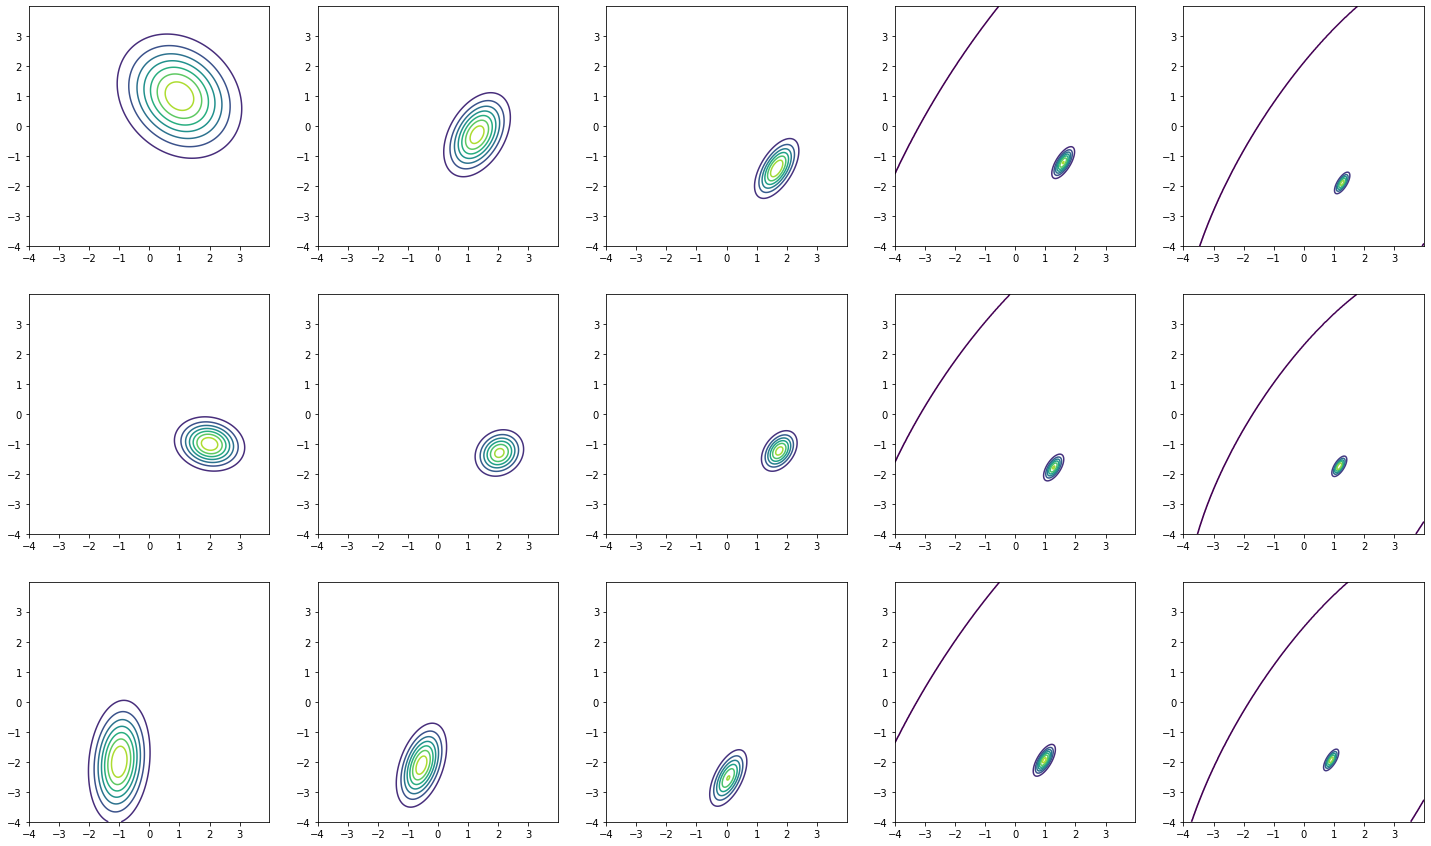

In [91]:
from scipy.stats import multivariate_normal

Mu = np.array([1, -2])
Sigma = np.array([[2,2],[2,4]])
Lambda = np.linalg.inv(Sigma)

x1 = np.arange(-4,4,0.01)
x2 = np.arange(-4,4,0.01)
X = np.array(np.meshgrid(x1, x2)).reshape(2,len(x1)*len(x2)).T

m = np.array([[1,2,-1],[1,-1,-2]])
m = np.array([[[1],[1]], [[2],[-1]], [[-1],[-2]]])

lamda_mu = np.array([[[1,0.2],[0.2,1]], [[3,-0.2],[0.5,5]], [[4,-0.1],[-0.3,1]]])

N = [0, 3, 10, 50, 100]
fig, ax = plt.subplots(3, 5, figsize=(25,15))

for i in range(3):
    for j, n in enumerate(N):
        sample = multivariate_normal.rvs(Mu,Sigma,size=n)

        lamda_mu_hat = n*Lambda + lamda_mu[i]
        m_hat = np.linalg.inv(lamda_mu_hat)@(Lambda@np.sum(sample, axis=0).reshape(-1,1)+lamda_mu[i]@m[i])
        
        y = multivariate_normal.pdf(X, m_hat.T[0], np.linalg.inv(lamda_mu_hat))
    
        ax[i][j].contour(x1, x2, y.reshape(len(x2),len(x1)))

#### 精度が未知の場合
観測モデルを次のように置く。
$$
p(\boldsymbol{x}|\boldsymbol{\Lambda})=N(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Lambda}^{-1})
$$
精度行列$\boldsymbol{\Lambda}$を生成するための確率分布としては、つぎのようなウィシャート事前分布がある。
$$
p(\boldsymbol{\Lambda})=W(\boldsymbol{\Lambda}|\nu,\boldsymbol{W})
$$
ここで$\boldsymbol{W}\in R^{D×D}$は正定値行列であり、$\nu$は$\nu>D-1$を満たす実数値として事前に与える。
ベイズの定理を用いれば、データ$\boldsymbol{X}=\{\boldsymbol{x}_1,\cdots,\boldsymbol{x}_N\}$を観測したあとの事後分布は次のように対数で表すことができる。
$$
\ln p(\boldsymbol{\Lambda}|\boldsymbol{X})=\sum_{n=1}^N\ln N(\boldsymbol{x}_n|\boldsymbol{\mu},\boldsymbol{\Lambda}^{-1})+\ln W(\boldsymbol{\Lambda}|\nu,\boldsymbol{W})+const.
$$
ガウス分布の式とウィシャート分布の対数に従って計算を進め、$\boldsymbol{\Lambda}$に関する項のみを取り出すと次のようになる。
$$
\ln p(\boldsymbol{\Lambda}|\boldsymbol{X})=\frac{N+\nu-D-1}{2}\ln |\boldsymbol{\Lambda}|-\frac{1}{2}Tr\bigl[\{\sum_{n=1}^N(\boldsymbol{x}_n-\boldsymbol{\mu})(\boldsymbol{x}_n-\boldsymbol{\mu})^T+\boldsymbol{W}^{-1}\}\boldsymbol{\Lambda}\bigr]+const.
$$
得られた確率分布は次のようにパラメータをおいたウィシャート分布であることがわかる。
$$
\begin{align}
p(\boldsymbol{\Lambda}|\boldsymbol{X})&=W(\boldsymbol{\Lambda}|\hat{\nu},\hat{\boldsymbol{W}})\\
ただし\hat{\boldsymbol{W}}^{-1}&=\sum_{n=1}^N(\boldsymbol{x}_n-\boldsymbol{\mu})(\boldsymbol{x}_n-\boldsymbol{\mu})^T+\boldsymbol{W}^{-1}\\
\hat{\nu}&=N+\nu
\end{align}
$$
未観測のベクトル$\boldsymbol{x}_*$に関する予測分布$p(\boldsymbol{x}_*)$はベイズの定理から次のように表せる。
$$
\ln p(\boldsymbol{x}_*)=\ln p(\boldsymbol{x}_*|\boldsymbol{\Lambda})-\ln p(\boldsymbol{\Lambda}|\boldsymbol{x}_*)+const.
$$
ここで、$p(\boldsymbol{\Lambda}|\boldsymbol{x}_*)$は事後分布の計算結果を流用すれば次のように書ける。
$$
\begin{align}
p(\boldsymbol{\Lambda}|\boldsymbol{x}_*)&=W(\boldsymbol{\Lambda}|1+\nu,\boldsymbol{W}(\boldsymbol{x}_*))\\
ただし\boldsymbol{W}(\boldsymbol{x}_*)^{-1}&=(\boldsymbol{x}_*-\boldsymbol{\mu})(\boldsymbol{x}_*-\boldsymbol{\mu})^T+\boldsymbol{W}^{-1}
\end{align}
$$
この結果を利用して計算を進めると、$\boldsymbol{x}_*$に関して次のような形式をとる。
$$
\ln p(\boldsymbol{x}_*)=-\frac{1+\nu}{2}\ln\{1+(\boldsymbol{x}_*-\boldsymbol{\mu})^T\boldsymbol{W}(\boldsymbol{x}_*-\boldsymbol{\mu})\}+const.
$$
これは、次の式で定義されるような$\boldsymbol{x}\in R^D$上の多次元版のスチューデントのt分布であることが知られている。
$$
St(\boldsymbol{x}|\boldsymbol{\mu}_s,\boldsymbol{\Lambda}_s,\nu_s)=\frac{\Gamma(\frac{\nu_s+D}{2})}{\Gamma(\frac{\nu_s}{2})}\frac{|\boldsymbol{\Lambda}_s|^{\frac{1}{2}}}{(\pi\nu_s)^{\frac{D}{2}}}\biggl\{1+\frac{1}{\nu}(\boldsymbol{x}-\boldsymbol{\mu}_s)^T\boldsymbol{\Lambda}_s(\boldsymbol{x}-\boldsymbol{\mu}_s) \biggr\}^{-\frac{\nu_s+D}{2}}
$$
ここで$\boldsymbol{\mu}_s\in R^D$、正定値行列$\boldsymbol{\Lambda}_s\in R^{D×D}$および$\nu_s\in R$はこの分布のパラメータである。
この式の対数を取って、$\boldsymbol{x}$に関わる項のみで書き表せば、
$$
\ln St(\boldsymbol{x}|\boldsymbol{\mu}_s,\boldsymbol{\Lambda}_s,\nu_s)=-\frac{\nu_s+D}{2}\ln \biggl\{1+\frac{1}{\nu}(\boldsymbol{x}-\boldsymbol{\mu}_s)^T\boldsymbol{\Lambda}_s(\boldsymbol{x}-\boldsymbol{\mu}_s) \biggr\}+const.
$$
のようになるので、計算結果を照らし合わせて、最終的に得られる予測分布は次のように書き表すことができる。
$$
\begin{align}
p(\boldsymbol{x}_*)&=St(\boldsymbol{x}_*|\boldsymbol{\mu}_s,\boldsymbol{\Lambda}_s,\nu_s)\\
ただし\boldsymbol{\mu}_s&=\boldsymbol{\mu}\\
\boldsymbol{\Lambda}_s&=(1-D+\nu)\boldsymbol{W}\\
\nu_s&=1-D+\nu
\end{align}
$$

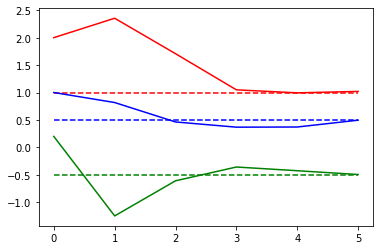

In [164]:
from scipy.stats import wishart

Mu = np.array([1, -2])
Sigma = np.array([[2,2],[2,4]])
Lambda = np.linalg.inv(Sigma)

W = np.array([[2,0.2],[0.2,1]])
nu = 2

s_xx = []
s_yy = []
s_xy = []

N = [0, 3, 10, 50, 100, 500]

for n in N:
    sample = multivariate_normal.rvs(Mu,Sigma,size=n)

    W_hat_inv = (sample-Mu).T@(sample-Mu)+np.linalg.inv(W)
    W_hat = np.linalg.inv(W_hat_inv)
    nu_hat = nu + n

    Lambda_s = (1-2+nu_hat)*W_hat
    
    s_xx.append(Lambda_s[0][0])
    s_yy.append(Lambda_s[1][1])
    s_xy.append(Lambda_s[0][1])

plt.plot(s_xx, color='red')
plt.plot(s_yy, color='blue')
plt.plot(s_xy, color='green')

plt.hlines(Lambda[0][0],0,5, color='red', linestyles='--')
plt.hlines(Lambda[1][1],0,5, color='blue', linestyles='--')
plt.hlines(Lambda[0][1],0,5, color='green', linestyles='--')

# wishart.rvs(nu_hat, W_hat)

#### 平均・精度が未知の場合
観測モデルを次のようにおく。
$$
p(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Lambda})=N(\boldsymbol{x}|\boldsymbol{\mu},\boldsymbol{\Lambda}^{-1})
$$
事前分布として次のようなガウス・ウィシャート分布を用いれば、事後分布が同じ形式で得られる。
$$
\begin{align}
p(\boldsymbol{\mu},\boldsymbol{\Lambda})&=NW(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{m},\beta,\nu,\boldsymbol{W})\\
&=N(\boldsymbol{\mu}|\boldsymbol{m},(\beta\boldsymbol{\Lambda})^{-1})W(\boldsymbol{\Lambda}|\nu,\boldsymbol{W})
\end{align}
$$
データ$\boldsymbol{X}$を観測した後の事後分布を求める。
これはベイズの定理を使って次のように計算できる。
$$
p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{X})=\frac{p(\boldsymbol{X}|\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{\mu},\boldsymbol{\Lambda})}{p(\boldsymbol{X})}
$$
ここでは、$\boldsymbol{\mu}$と$\boldsymbol{\Lambda}$の事後分布は条件付き分布によって
$$
p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{X})=p(\boldsymbol{\mu}|\boldsymbol{\Lambda},\boldsymbol{X})p(\boldsymbol{\Lambda}|\boldsymbol{X})
$$
のように分解できるので、まず平均$\boldsymbol{\mu}$の事後分布を求め、そのあとで$\boldsymbol{\Lambda}$の事後分布を求めればよい。
まず、$p(\boldsymbol{\mu}|\boldsymbol{\Lambda},\boldsymbol{X})$に関しては、以前の計算結果から、精度行列を$\beta\boldsymbol{\Lambda}$とおくことにより求めることができる。
$$
\begin{align}
p(\boldsymbol{\mu}|\boldsymbol{\Lambda},\boldsymbol{X})&=N(\boldsymbol{\mu}|\hat{\boldsymbol{m}},(\hat{\beta}\boldsymbol{\Lambda})^{-1})\\
ただし\hat{\beta}&=N+\beta\\
\hat{\boldsymbol{m}}&=\frac{1}{\hat{\beta}}(\sum_{n=1}^N\boldsymbol{x}_n+\beta\boldsymbol{m})
\end{align}
$$
次に$p(\boldsymbol{\Lambda}|\boldsymbol{X})$を求める。$\boldsymbol{\Lambda}$に注目して対数で整理すると、
$$
\ln p(\boldsymbol{\Lambda}|\boldsymbol{X})=\ln p(\boldsymbol{X}|\boldsymbol{\mu},\boldsymbol{\Lambda})+\ln p(\boldsymbol{\mu},\boldsymbol{\Lambda})-\ln p(\boldsymbol{\mu}|\boldsymbol{\Lambda},\boldsymbol{X})+const.
$$
が成り立つ。$p(\boldsymbol{\mu}|\boldsymbol{\Lambda},\boldsymbol{X})$は計算済みの結果がそのまま代入できるので、これにより$\boldsymbol{\Lambda}$の分布を調べることができ、
$$
\ln p(\boldsymbol{\Lambda}|\boldsymbol{X})=\frac{N+\nu-D-1}{2}\ln |\boldsymbol{\Lambda}|-\frac{1}{2}Tr\bigl[\{\sum_{n=1}^N\boldsymbol{x}_n\boldsymbol{x}_n^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}\hat{\boldsymbol{m}}\hat{\boldsymbol{m}}^T+\boldsymbol{W}^{-1} \}\boldsymbol{\Lambda} \bigr]+const.
$$
という形に整理できる。
あとはウィシャート分布の定義式と対応関係を取れば、次のように表すことができる。
$$
\begin{align}
p(\boldsymbol{\Lambda}|\boldsymbol{X})&=W(\boldsymbol{\Lambda}|\hat{\nu},\hat{\boldsymbol{W}})\\
ただし\hat{\boldsymbol{W}}^{-1}&=\sum_{n=1}^N\boldsymbol{x}_n\boldsymbol{x}_n^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}\hat{\boldsymbol{m}}\hat{\boldsymbol{m}}^T+\boldsymbol{W}^{-1}\\
\hat{\nu}=N+\nu
\end{align}
$$
次に事前分布$p(\boldsymbol{\mu},\boldsymbol{\Lambda})$を使った予測分布の計算を行う。
新しいデータ点$\boldsymbol{x}_*\in R^D$に対する予測分布は、ベイズの定理によって次のような式が成り立つ。
$$
\ln p(\boldsymbol{x}_*)=\ln p(\boldsymbol{x}_*|\boldsymbol{\mu},\boldsymbol{\Lambda})-\ln p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{x}_*)+const.
$$
ここで2つ目の項は、ガウス・ウィシャート事後分布の計算結果を流用すれば、
$$
\begin{align}
p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{x}_*)&=N(\boldsymbol{\mu}|\boldsymbol{m}(\boldsymbol{x}_*),((1+\beta)\boldsymbol{\Lambda})^{-1})W(\boldsymbol{\Lambda}|1+\nu,\boldsymbol{W}(\boldsymbol{x}_*))\\
ただし\boldsymbol{m}(\boldsymbol{x}_*)&=\frac{\boldsymbol{x}_*+\beta\boldsymbol{m}}{1+\beta}\\
\boldsymbol{W}(\boldsymbol{x}_*)^{-1}&=\frac{\beta}{1+\beta}(\boldsymbol{x}_*-\boldsymbol{m})(\boldsymbol{x}_*-\boldsymbol{m})^T+\boldsymbol{W}^{-1}
\end{align}
$$
と書ける。
これを使えば、
$$
\ln p(\boldsymbol{x}_*)=-\frac{1+\nu}{2}\ln\{1+\frac{\beta}{1+\beta}(\boldsymbol{x}_*-\boldsymbol{m})^T\boldsymbol{W}(\boldsymbol{x}_*-\boldsymbol{m}) \}+const.
$$
となる。
これは多次元のスチューデントのt分布の対数表現と一致しており、対応関係を取れば、
$$
\begin{align}
p(\boldsymbol{x}_*)&=St(\boldsymbol{x}_*|\boldsymbol{\mu}_s,\boldsymbol{\Lambda}_s,\nu_s)\\
ただし\boldsymbol{\mu}_s&=\boldsymbol{m}\\
\boldsymbol{\Lambda}_s&=\frac{(1-D+\nu)\beta}{1+\beta}\boldsymbol{W}\\
\nu_s&=1-D+\nu
\end{align}
$$
として予測分布が求まる。

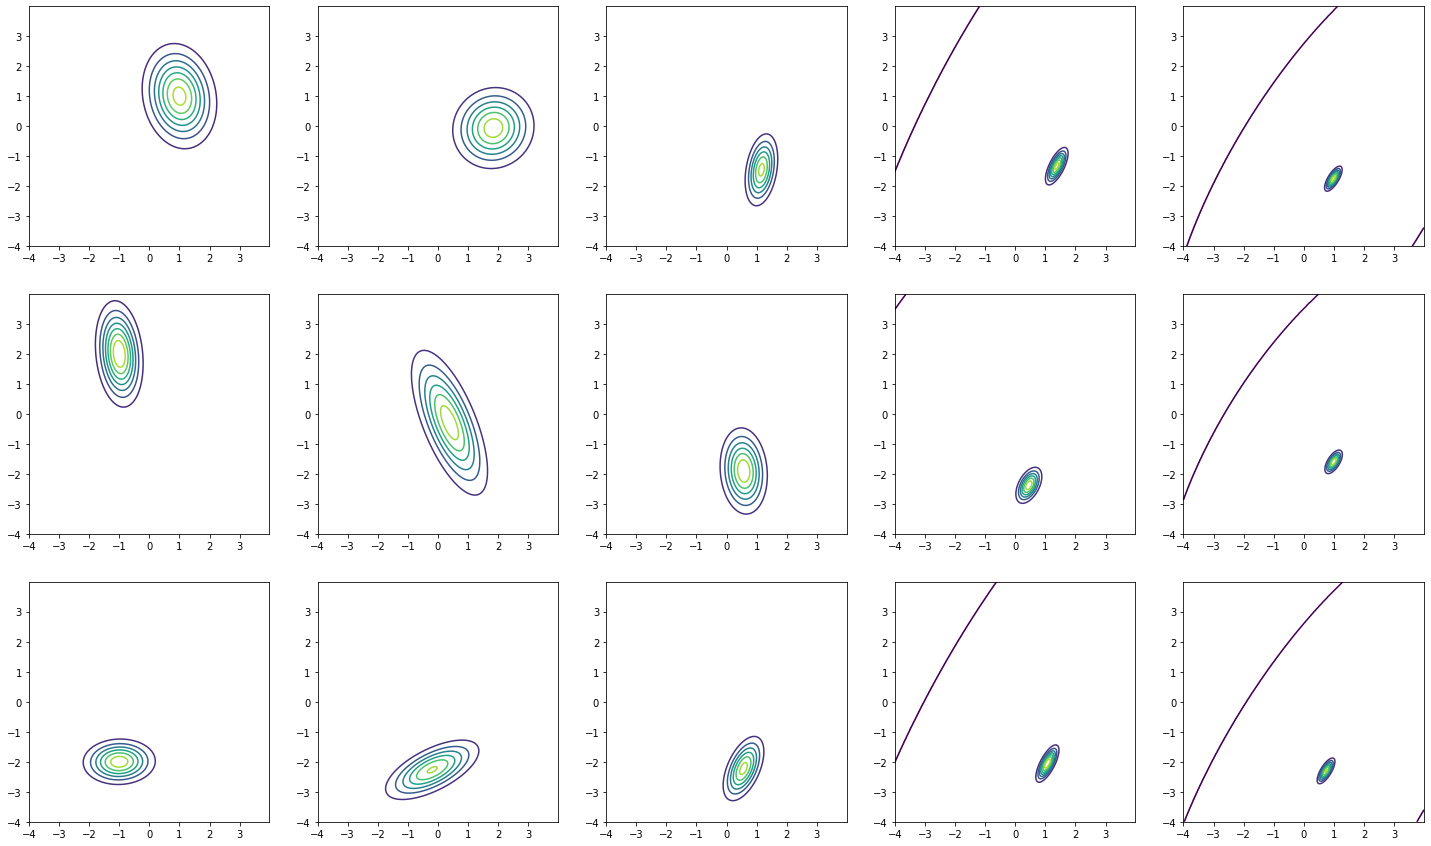

In [210]:
beta = 2
m = np.array([[[1],[1]], [[-1],[2]], [[-1],[-2]]])
W = np.array([[[2,0.2],[0.2,1]], [[5,0.1],[0.4,1]], [[2,-0.6],[-0.1,5]]])
nu = 2

N = [0, 3, 10, 50, 100]
fig, ax = plt.subplots(3, 5, figsize=(25,15))

for i in range(3):
    s_xx = []
    s_yy = []
    s_xy = []
    for j, n in enumerate(N):
        sample = multivariate_normal.rvs(Mu, Sigma, size=n)

        beta_hat = beta + n
        m_hat = (np.sum(sample, axis=0).reshape(-1,1)+beta*m[i]) / beta_hat

        W_hat_inv = sample.T@sample + beta*m[i]@m[i].T - beta_hat*m_hat@m_hat.T + np.linalg.inv(W[i])
        W_hat = np.linalg.inv(W_hat_inv)
        nu_hat = nu + n

        Lambda_s = (1-len(m[i])+nu_hat)*beta_hat/(1+beta_hat)*W_hat
        
        s_xx.append(Lambda_s[0][0])
        s_yy.append(Lambda_s[1][1])
        s_xy.append(Lambda_s[0][1])

        y = multivariate_normal.pdf(X, m_hat.T[0], np.linalg.inv(beta_hat*Lambda_s))

        ax[i][j].contour(x1, x2, y.reshape(len(x2),len(x1)))

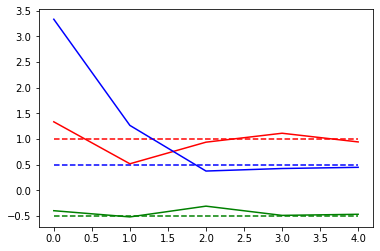

In [211]:
plt.plot(s_xx, color='red')
plt.plot(s_yy, color='blue')
plt.plot(s_xy, color='green')

plt.hlines(Lambda[0][0],0,4, color='red', linestyles='--')
plt.hlines(Lambda[1][1],0,4, color='blue', linestyles='--')
plt.hlines(Lambda[0][1],0,4, color='green', linestyles='--')


### 線形回帰の例
#### モデルの構築
実数の出力値$y_n\in R$は入力値$\boldsymbol{x}_n\in R^M$、パラメータ$\boldsymbol{w}\in R^M$。ノイズ成分$\epsilon_n\in R$を使って次のようにモデル化される。
$$
y_n=\boldsymbol{w}^T\boldsymbol{x}_n+\epsilon_n
$$
ここではノイズ成分$\epsilon_n$が次のような平均ゼロのガウス分布に従っていると仮定する。
$$
\epsilon_n\sim N(\epsilon_n|0,\lambda^{-1})
$$
ここで、$\lambda \in R^+$は1次元ガウス分布の既知の精度パラメータであるとする。
次のような表記で$y_n$の確率分布を定式化する。
$$
p(y_n|\boldsymbol{x}_n,\boldsymbol{w})=N(y_n|\boldsymbol{w}^T\boldsymbol{x}_n,\lambda^{-1})
$$
次のような事前分布を設定する。
$$
p(\boldsymbol{w})=N(\boldsymbol{w}|\boldsymbol{m},\boldsymbol{\Lambda}^{-1})
$$
ここで、$\boldsymbol{m}\in R^M$は平均パラメータ、正定値行列$\boldsymbol{\Lambda}\in R~{M×M}$は精度行列パラメータである。

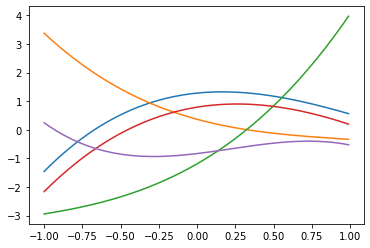

In [246]:
from scipy.stats import norm

M = 4

m = np.zeros(M)
Lambda = np.eye(M)
lmd = 10

for _ in range(5):
    w = multivariate_normal.rvs(m, np.linalg.inv(Lambda), size=1)
    x = np.arange(-1,1,0.01)
    wx=w@np.array([np.ones(len((x))),x**1,x**2,x**3])
    y = norm.rvs(wx,1/lmd)

    plt.plot(x, wx)

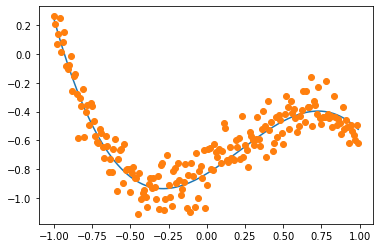

In [248]:
plt.plot(x, wx)
plt.plot(x, y, 'o')

#### 事後分布と予測分布の計算
データを観測した後の事後分布と予測分布を求める。
事後分布はベイズの定理を用いれば次のように書くことができる。
$$
\begin{align}
p(\boldsymbol{w}|\boldsymbol{Y},\boldsymbol{X})&=\frac{p(\boldsymbol{w})\prod_{n=1}^Np(y_n|\boldsymbol{x}_n,\boldsymbol{w})}{p(\boldsymbol{Y}|\boldsymbol{X})}\\
&\propto p(\boldsymbol{w})\prod_{n=1}^Np(y_n|\boldsymbol{x}_n,\boldsymbol{w})
\end{align}
$$

対数を取ることにより、
$$
\ln p(\boldsymbol{w}|\boldsymbol{Y},\boldsymbol{X})=-\frac{1}{2}\{\boldsymbol{w}^T(\lambda\sum_{n=1}^N\boldsymbol{x}_n\boldsymbol{x}_n^T+\boldsymbol{\Lambda})\boldsymbol{w}-2\boldsymbol{w}^T(\lambda\sum_{n=1}^Ny_n\boldsymbol{x}_n+\boldsymbol{\Lambda}\boldsymbol{m}) \}+const.
$$
と計算できることから、$\boldsymbol{w}$の事後分布は次のように事前分布と同じ$M$次元ガウス分布として書けることが分かる。
$$
\begin{align}
p(\boldsymbol{w}|\boldsymbol{Y},\boldsymbol{X})&=N(\boldsymbol{w}|\hat{\boldsymbol{m}},\hat{\boldsymbol{\Lambda}}^{-1})\\
ただし\hat{\boldsymbol{\Lambda}}&=\lambda\sum_{n=1}^N\boldsymbol{x}_n\boldsymbol{x}_n^T+\boldsymbol{\Lambda}\\
\hat{\boldsymbol{m}}&=\hat{\boldsymbol{\Lambda}}^{-1}(\lambda\sum_{n=1}^Ny_n\boldsymbol{x}_n+\boldsymbol{\Lambda}\boldsymbol{m})
\end{align}
$$
次に、新規入力値$\boldsymbol{x}_{*}$が与えられたときの出力値$y_*$の予測分布$p(y_*|\boldsymbol{x}_*,\boldsymbol{Y},\boldsymbol{X})$も求める。
ベイズの定理により次の式が成り立つ。
$$
p(\boldsymbol{w}|y_*,\boldsymbol{x}_*)=\frac{p(\boldsymbol{w})p(y_*|\boldsymbol{x}_*,\boldsymbol{w})}{p(y_*|\boldsymbol{x}_*)}
$$
これの対数を取ると
$$
\ln p(y_*|\boldsymbol{x}_*)=\ln p(y_*|\boldsymbol{x}_*,\boldsymbol{w})-\ln p(\boldsymbol{w}|y_*,\boldsymbol{x}_*)+const.
$$
となります。
事後分布の計算結果を流用すると、
$$
\begin{align}
p(\boldsymbol{w}|y_*,\boldsymbol{x}_*)&=N(\boldsymbol{w}|\boldsymbol{m}(y_*),(\lambda \boldsymbol{x}_*\boldsymbol{x}_*^T+\boldsymbol{\Lambda})^{-1})\\
ただし、\boldsymbol{m}(y_*)&=(\lambda \boldsymbol{x}_*\boldsymbol{x}_*^T+\boldsymbol{\Lambda})^{-1}(\lambda y_*\boldsymbol{x}_*+\boldsymbol{\Lambda}\boldsymbol{m})
\end{align}
$$
と表すことができる。
これらをもとに整理すると、
$$
\ln p(y_*|\boldsymbol{x}_*)=-\frac{1}{2}\{(\lambda - \lambda^2\boldsymbol{x}_*^T(\lambda \boldsymbol{x}_*\boldsymbol{x}_*^T+\boldsymbol{\Lambda})^{-1}\boldsymbol{x}_*)y_*^2-2\boldsymbol{x}_*^T\lambda (\lambda \boldsymbol{x}_*\boldsymbol{x}_*^T+\boldsymbol{\Lambda})^{-1}\boldsymbol{\Lambda}\boldsymbol{m}y_* \}+const.
$$
のように2次関数として表される。
これは結果として次のようなガウス分布としてまとめられる。
$$
\begin{align}
p(y_*|\boldsymbol{x}_*)&=N(y_*|\mu_*,\lambda_*^{-1})\\
ただし、\mu_*&=\boldsymbol{m}^T\boldsymbol{x}_*\\
\lambda_*^{-1}&=\lambda^{-1}+\boldsymbol{x}_*^T\boldsymbol{\Lambda}^{-1}\boldsymbol{x}_*
\end{align}
$$


(-2.0, 2.0)

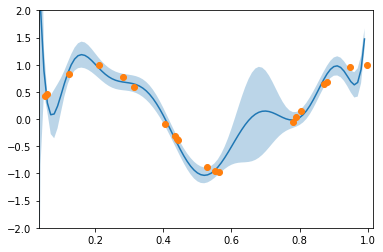

In [611]:
from sklearn.preprocessing import PolynomialFeatures

x = np.random.rand(20)
y = np.sin(x*8).reshape(-1,1)

M = 10

m = np.ones(M+1)
Lambda = np.ones((M+1,M+1))
lmd = 10

poly = PolynomialFeatures(degree=M)
x_poly = poly.fit_transform(x.reshape(-1, 1))

Lambda_hat = lmd*x_poly.T@x_poly+Lambda
m_hat = np.linalg.inv(Lambda_hat)@(lmd * np.sum(y*x_poly, axis=0) + Lambda@m)

x_test = np.arange(0,1,0.01)
x_test_poly = poly.fit_transform(x_test.reshape(-1, 1)).reshape(len(x_test),M+1,1)
lmd_inv = (1/lmd+x_test_poly.transpose(0,2,1)@np.linalg.inv(Lambda_hat)@x_test_poly).ravel()
y_pred = (m_hat@x_test_poly).ravel()

plt.plot(x_test, y_pred)
plt.fill_between(x_test, y_pred-lmd_inv,  y_pred+lmd_inv, alpha=.3)
plt.plot(x, np.sin(x*8), 'o')
plt.xlim(min(x)-0.02,max(x)+0.02)
plt.ylim(-2,2)